In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('housing.csv')

In [20]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [21]:
df.drop(columns= ['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], inplace = True)

In [22]:
df.isnull().sum()

price    0
area     0
dtype: int64

In [23]:
df['price'] = df['price']/10000
df['area'] = df['area']/10
df['price'] = df['price'].astype(int)
df['price']

0      1330
1      1225
2      1225
3      1221
4      1141
       ... 
540     182
541     176
542     175
543     175
544     175
Name: price, Length: 545, dtype: int64

<Axes: xlabel='area', ylabel='price'>

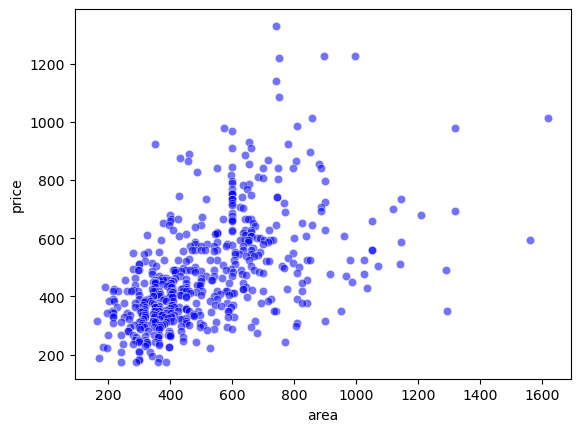

In [24]:
sns.scatterplot(data = df, x = 'area',y = 'price',c = 'b',alpha = 0.55)

<Axes: ylabel='price'>

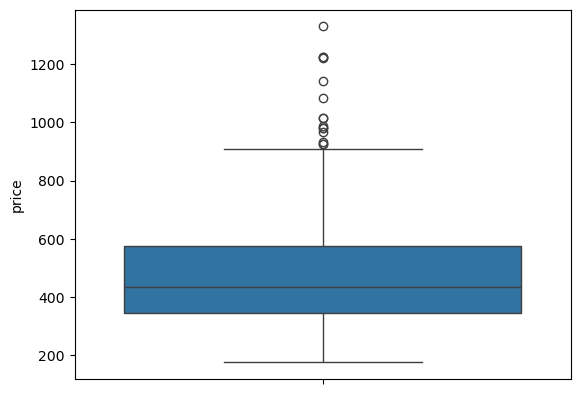

In [25]:
sns.boxplot(y='price', data=df)

In [26]:
x = np.array(df['area'])
y = np.array(df['price'])
m = len(x)
fx= np.zeros(m)
x = np.float64(x)
y = np.float64(y)

In [27]:
def compute_output(x,w,b):
    for i in range(m):
        fx[i] = w * x[i] + b
    return fx


Text(0, 0.5, 'Price')

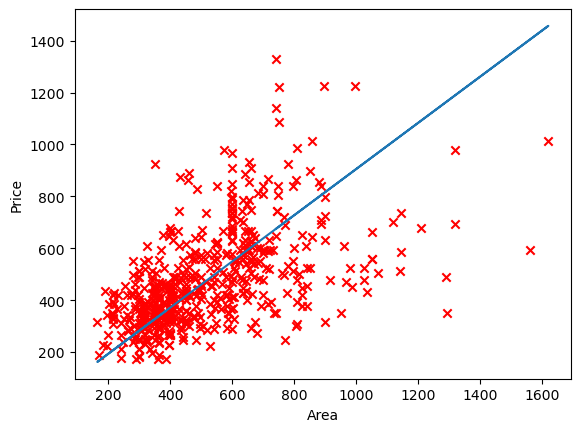

In [28]:
tmp_fx = compute_output(x, 0.89,15)
plt.plot(x, tmp_fx)
plt.scatter(x, y,marker='x', c='r',label='Actual Values')
plt.xlabel('Area')
plt.ylabel('Price')


In [29]:
def compute_cost(x,y,w,b):
    cost = 0
    for i in range(m):
        cost += (w * x[i] +b -y[i]) ** 2
    total_cost = cost / (2*m)
    return total_cost


In [30]:
cost = compute_cost(x,y,1,3)
cost

20109.081642201832

In [31]:
def compute_gradient(x,y,w,b):
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (w*x[i]+b-y[i])*x[i]
        dj_db += (w*x[i]+b-y[i])
    dj_dw /=m
    dj_db /=m
    return dj_dw, dj_db

In [32]:
def gradient_descent(x,y,w,b, alpha, iterations, gradient_function):  
    for i in range(iterations):
        
        dj_dw , dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    
    return w,b

In [33]:
w,b = gradient_descent(x,y,0,0,0.00245,10000,compute_gradient)


/tmp/ipykernel_37994/2533752791.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw += (w*x[i]+b-y[i])*x[i]
/tmp/ipykernel_37994/2020686798.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - alpha * dj_dw


In [34]:
w,b = gradient_descent(x,y,0,0,0.001,100,compute_gradient)


In [35]:
w


-1.7732374027930836e+249

In [36]:
b

-2.9245741346847328e+246